# Plot animado sobre un data set de ahorro

Este plot está pensado para poder crear una animación que permita comprender la diferencia entre tres personas que comienzan a ahorrar lo mismo a distintas edades.
A su vez la idea es que se vea que con un pequeño esfuerzo en el largo tiempo se puede obtener un resultado más provechoso que con mucho esfuerzo en poco tiempo. 

###### Importamos las librerías necesarias y seteamos el fondo del plot

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
%matplotlib notebook

ImportError: cannot import name 'ellipkm1' from 'scipy.special._ufuncs' (unknown location)

###### Tomamos los datos del excel

In [6]:
df = pd.read_excel('df_ahorro.xlsx')
df['AHORRO']= pd.Categorical(df['AHORRO'])
df.head(2)

,CUENTA,EDAD,AHORRO,AÑOS
0,318.0,25 AÑOS,USD 100,1
1,1013.0,25 AÑOS,USD 100,2


**CUENTA**   serán los valores que se van a plotear sobre la 'X'                                                            
**EDAD**     categorías a representar a tres personas distintas sobre 'Y'                                                   
**AHORRO**   categoría que me va a permitir diferenciar para cada persona una barra 'HUE'                                   
**AÑOS**     agrupando los valores de cuenta para cada año voy a poder plotear los 9 planes totales, tres por edad.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 4 columns):
CUENTA    540 non-null float64
EDAD      540 non-null object
AHORRO    540 non-null category
AÑOS      540 non-null int64
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 13.4+ KB


###### Bucle para crear las imágenes. 

In [ ]:
for i in df.AÑOS.unique():                # Con esto puedo iterar por los años ploteando todos los valores para cada año. 
    tmp = df[df.AÑOS == i]                # Guardo la variable para que sea mas simple el indexar
    
    fig = plt.figure(figsize=(800/96, 600/96), dpi=96)     # Creo el tablero, no se porqué el dpi, eso lo saqué de un tutorial

    ax = sns.barplot(x=tmp['CUENTA']  , y=tmp['EDAD'], hue=tmp['AHORRO'],  # Tomo los valores para ese año y los ploteo
                hue_order=['USD 200','USD 150','USD 100'], data=tmp,       # Le doy un orden específico
                palette="Blues_d", ci=None)                                # Le pongo color y saco el ci (la barrita)
    
    plt.title('AÑO '+str(i),fontsize=20)                                   # Creo el titulo dinámico 
    plt.xlabel('CAPITAL EN LA CUENTA A TRAVÉS DE LOS AÑOS',fontsize=14)    # Agrego las labels
    plt.ylabel('EDADES DE COMIENZO',fontsize=14)
    plt.xlim(0,450000)                                              # Limito las 'X' para mantener siempre el tamaño
    plt.ylim(2.8,-0.8)                                              # Limito la 'Y' para mantener el tamaño ya que varia
    ax.legend(loc=4)                                                # Coloco abajo las leyendas para que no la tome el ploteo
    
    for p in ax.patches:                                     # Respuesta a mis plegarias, patches toma los 9 valores únicos
        largo = int(round(p.get_width()))                    # le pido que tome el largo, lo redondee y lo convierta en int
        ax.text(largo+38000,p.get_y()+0.2,"USD "+str(largo), ha='center') # Ploteo el texto y lo acomodo. 
    
    nombre_archivo = 'ejemplo_'+str(i).zfill(4)+'.jpg'       # Creo una variable con el nombre del archivo dinámico
    plt.savefig(nombre_archivo, dpi=96)                      # Guardo el cada ploteo
    plt.gca()                                                # Esto no lo terminé de entender lo saque de un tuto

###### Convirtiendo las imágenes en un gif
Para esto utilizo una aplicación que se llama ImageMagick.
http://www.imagemagick.org/script/index.php
Una vez instalada la versión para mi sistema operativo abro la linea de comandos, me translado a la carpeta donde están las imágenes y aplico el siguiente código
`convert -delay 15 -loop 0 ejemplo_*.jpg ani_Ahorro.gif`

**delay** Es lo que le da la velocidad a la imágen                                                                        
**loop** Establece la cantidad de veces que se repite, como está en 0 se repite infinitamente                               
**ejemplo_*.jpg** Es el nombre de los archivos y con * toma todo lo que esté en el medio                                    
**ani_Ahorro.gif** Es el nombre del nuevo archivo

**Es importante en la instalación agregar la herramienta convert cuando pregunta que cosas instalar y cuales no**

### Plot de prueba
Este plot es la base que utilizo para darle forma al plot que luego se va a pasar por el bucle for para crear todos los plots

<IPython.core.display.Javascript object>


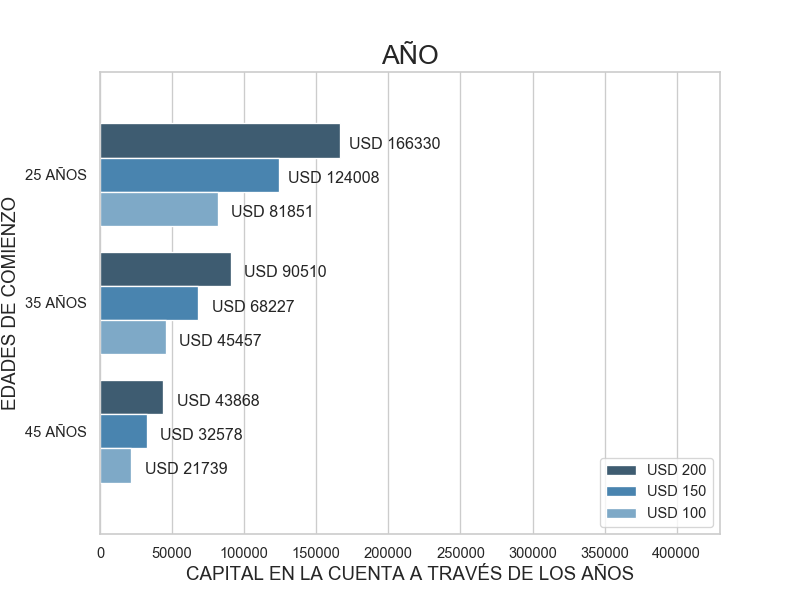

In [90]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(800/96, 600/96), dpi=96)

ax = sns.barplot(x=df['CUENTA']  , y=df['EDAD'], hue=df['AHORRO'], 
            hue_order=['USD 200','USD 150','USD 100'], data=df, 
            palette="Blues_d", ci=None)

plt.title('AÑO',fontsize=20)
plt.xlabel('CAPITAL EN LA CUENTA A TRAVÉS DE LOS AÑOS',fontsize=14)
plt.ylabel('EDADES DE COMIENZO',fontsize=14)
plt.xlim(0,430000)
plt.ylim(2.8,-0.8)
ax.legend(loc=4)

for p in ax.patches:
    largo = int(round(p.get_width()))
    ax.text(largo+38000,p.get_y()+0.2,"USD "+str(largo), ha='center')